In [1]:
!pip install jovian --upgrade --quiet

import jovian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 599.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# TODO

1.Pick the dataset                                              
2.Download the dataset

3.Import the dataset using pytorch

4.Explore the dataset

5.Prepare the dataset for training

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/datasets/alxmamaev/flowers-recognition'

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jordanmandam
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:01<00:00, 158MB/s]


### Import the Dataset Into PyTorch

use the `ImageFolder` class from `torchvision`.

In [6]:
data_dir = './flowers-recognition/flowers'

In [7]:
import os

In [8]:
os.listdir(data_dir)

['sunflower', 'tulip', 'rose', 'daisy', 'dandelion']

In [9]:
for cls in os.listdir(data_dir):
    print(cls, ':', len(os.listdir(data_dir + '/' + cls)))

sunflower : 733
tulip : 984
rose : 784
daisy : 764
dandelion : 1052


### Delete if any extra folder or folder need

 import shutil                               

`shutil.rmtree(data_dir + '/flowers')` --> Inside the Sub flower folder

In [10]:
os.listdir(data_dir)

['sunflower', 'tulip', 'rose', 'daisy', 'dandelion']

### Import the Dataset Into PyTorch

use the `ImageFolder` class from `torchvision`.

In [11]:
from torchvision.datasets import ImageFolder

In [12]:
dataset = ImageFolder(data_dir)

In [13]:
len(dataset)

4317

In [14]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=320x263>, 0)

In [15]:
dataset.classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

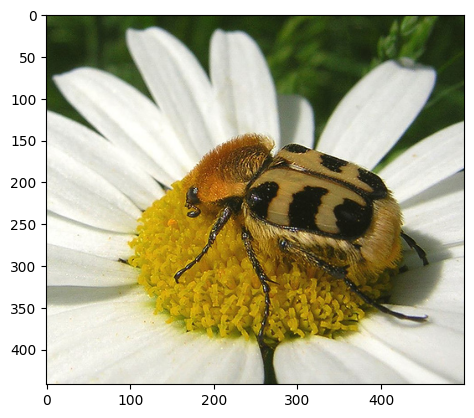

In [17]:
img, label = dataset[120]
plt.imshow(img)

In [18]:
import torchvision.transforms as tt

dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(64),
                                tt.RandomCrop(64),
                                            tt.ToTensor()]))

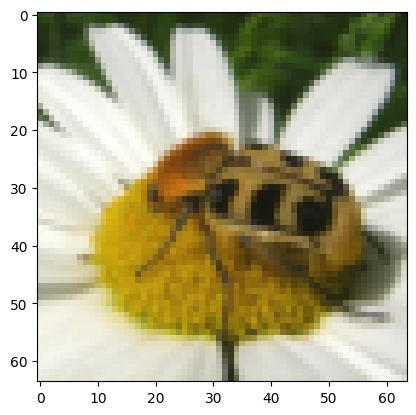

In [19]:
img, label = dataset[120]
plt.imshow(img.permute((1, 2, 0)))

In [20]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))
train_size = len(dataset) - val_size

train_size, val_size

(3886, 431)

In [21]:
from torch.utils.data import random_split

train_ds, valid_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(valid_ds)

(3886, 431)

In [22]:
from torch.utils.data import DataLoader

batch_size = 128

train_dl = DataLoader(train_ds,
                      batch_size,
                      shuffle=True,
                      num_workers=4,
                      pin_memory=True)

valid_dl = DataLoader(valid_ds,
                    batch_size*2,
                    num_workers=4,
                    pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [23]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

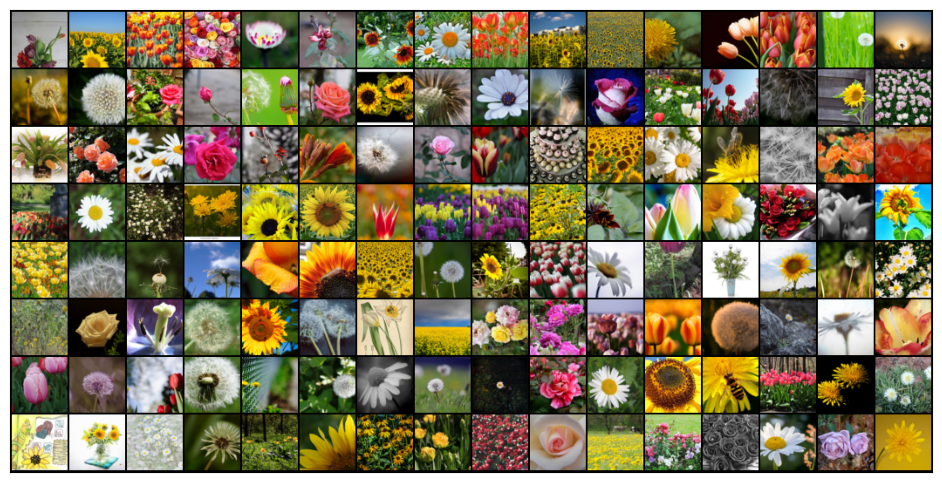

In [24]:
show_batch(train_dl)

### Utility Functions & Classes

In [25]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [26]:
import torch

torch.cuda.is_available()

True

In [27]:
device = get_default_device()

In [28]:
device

device(type='cuda')

In [29]:
img, label = dataset[0]

In [30]:
img

tensor([[[0.5765, 0.5608, 0.5529,  ..., 0.6627, 0.6667, 0.6510],
         [0.6275, 0.6157, 0.5961,  ..., 0.6627, 0.6588, 0.6353],
         [0.6275, 0.6235, 0.6275,  ..., 0.6588, 0.6392, 0.6196],
         ...,
         [0.5529, 0.5608, 0.5686,  ..., 0.5373, 0.5255, 0.5059],
         [0.5412, 0.5529, 0.5608,  ..., 0.5490, 0.5412, 0.5255],
         [0.5373, 0.5490, 0.5569,  ..., 0.5412, 0.5529, 0.5451]],

        [[0.5765, 0.5647, 0.5569,  ..., 0.6627, 0.6667, 0.6471],
         [0.6235, 0.6157, 0.5961,  ..., 0.6627, 0.6549, 0.6314],
         [0.6275, 0.6157, 0.6235,  ..., 0.6549, 0.6353, 0.6196],
         ...,
         [0.5490, 0.5569, 0.5647,  ..., 0.5255, 0.5098, 0.4902],
         [0.5373, 0.5490, 0.5569,  ..., 0.5373, 0.5255, 0.5098],
         [0.5333, 0.5451, 0.5529,  ..., 0.5255, 0.5373, 0.5294]],

        [[0.5804, 0.5569, 0.5373,  ..., 0.6745, 0.6824, 0.6667],
         [0.6392, 0.6314, 0.6000,  ..., 0.6824, 0.6745, 0.6471],
         [0.6471, 0.6353, 0.6431,  ..., 0.6745, 0.6549, 0.

In [31]:
img.device

device(type='cpu')

In [32]:
img_gpu = to_device(img, device)
img_gpu.device

device(type='cuda', index=0)

In [33]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

### Model and training Utilties model

In [34]:
import torch.nn as nn
import torch.nn.functional as F

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch for training data"
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        "calculate loss & accuracy for a batch for validation data"
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [35]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

### Model

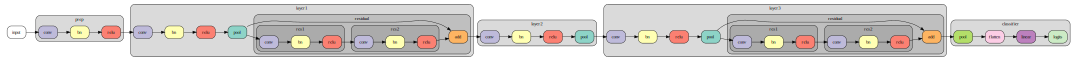

In [36]:
from IPython.display import SVG

SVG(url="https://raw.githubusercontent.com/lambdal/cifar10-fast/master/net.svg")

### In this Image the model process

In [37]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # Input: 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # Input: 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128),   # Input: 128 x 128 x 32 x 32
                                  conv_block(128, 128))   # Input: 128 x 128 x 32 x 32

        self.conv3 = conv_block(128, 256, pool=True) # Input: 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # Input: 128 x 512 x 8 x 8
        self.res2 = nn.Sequential(conv_block(512, 512), # Input: 128 x 512 x 8 x 8
                                  conv_block(512, 512)) # Input: 128 x 512 x 8 x 8

        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # Input: 128 x 512 x 1 x 1
                                        nn.Flatten(), # Input: 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [38]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [39]:
model.conv1[0].weight

Parameter containing:
tensor([[[[ 0.1341,  0.0597, -0.1122],
          [-0.1763, -0.1023,  0.1081],
          [ 0.0100, -0.1216, -0.1412]],

         [[-0.0557,  0.1395,  0.0116],
          [-0.1034, -0.1607,  0.1512],
          [ 0.1167, -0.0148, -0.1483]],

         [[-0.1111, -0.0989, -0.0923],
          [ 0.0489, -0.0108,  0.1792],
          [ 0.0396,  0.1736, -0.1791]]],


        [[[ 0.0751,  0.0033,  0.1362],
          [-0.1462,  0.1837, -0.1909],
          [-0.1147, -0.1006, -0.1097]],

         [[-0.0416,  0.1714, -0.1214],
          [ 0.1173,  0.1258, -0.0826],
          [ 0.0943, -0.0698,  0.0863]],

         [[ 0.0489, -0.1814,  0.0495],
          [-0.1232, -0.0132,  0.0249],
          [-0.0065, -0.1401, -0.0343]]],


        [[[-0.1047,  0.0762, -0.0361],
          [-0.0116, -0.0191, -0.0188],
          [ 0.1289,  0.0669, -0.1170]],

         [[-0.0346, -0.1432, -0.1103],
          [ 0.1703,  0.1420,  0.0611],
          [ 0.1692,  0.1402, -0.1366]],

         [[-0.1690, -0

In [40]:
model.conv1[0].weight.device

device(type='cuda', index=0)

### Pass one batch of input tensor through the model

In [41]:
torch.cuda.empty_cache()
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('image.device', images.device)
    preds = model(images)
    break

images.shape torch.Size([128, 3, 64, 64])
image.device cuda:0


### Training

In [42]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 1.6076278686523438, 'val_acc': 0.24004465341567993}]

In [61]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.Adam)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch [0], train_loss: 0.3577, val_loss: 0.6676, val_acc: 0.7810
Epoch [1], train_loss: 0.2691, val_loss: 0.7279, val_acc: 0.7801
Epoch [2], train_loss: 0.2571, val_loss: 0.6920, val_acc: 0.7831
Epoch [3], train_loss: 0.2279, val_loss: 0.7759, val_acc: 0.7744
Epoch [4], train_loss: 0.1897, val_loss: 0.6307, val_acc: 0.8132


In [62]:
history += fit(5, 0.001, model, train_dl, valid_dl, torch.optim.SGD)

Epoch [0], train_loss: 0.1519, val_loss: 0.5332, val_acc: 0.8304
Epoch [1], train_loss: 0.1323, val_loss: 0.5312, val_acc: 0.8325
Epoch [2], train_loss: 0.1302, val_loss: 0.5332, val_acc: 0.8372
Epoch [3], train_loss: 0.1237, val_loss: 0.5569, val_acc: 0.8228
Epoch [4], train_loss: 0.1204, val_loss: 0.5641, val_acc: 0.8217


In [63]:
history += fit(5, 0.0001, model, train_dl, valid_dl, torch.optim.Adam)

Epoch [0], train_loss: 0.1104, val_loss: 0.4632, val_acc: 0.8486
Epoch [1], train_loss: 0.0844, val_loss: 0.4955, val_acc: 0.8428
Epoch [2], train_loss: 0.0781, val_loss: 0.5193, val_acc: 0.8497
Epoch [3], train_loss: 0.0715, val_loss: 0.5240, val_acc: 0.8411
Epoch [4], train_loss: 0.0646, val_loss: 0.5453, val_acc: 0.8440


In [64]:
history += fit(5, 0.0001, model, train_dl, valid_dl)

Epoch [0], train_loss: 0.0680, val_loss: 0.5659, val_acc: 0.8294
Epoch [1], train_loss: 0.0605, val_loss: 0.5269, val_acc: 0.8371
Epoch [2], train_loss: 0.0541, val_loss: 0.5128, val_acc: 0.8572
Epoch [3], train_loss: 0.0530, val_loss: 0.5285, val_acc: 0.8677
Epoch [4], train_loss: 0.0515, val_loss: 0.5602, val_acc: 0.8447


In [65]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

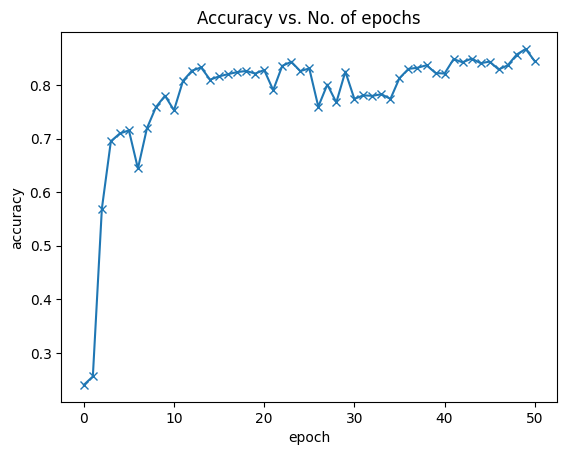

In [66]:
plot_accuracies(history)

In [67]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

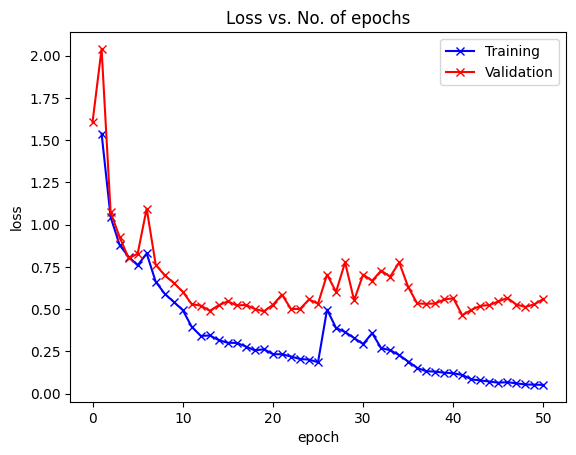

In [68]:
plot_losses(history)